<a href="https://colab.research.google.com/github/Rosefinch-Midsummer/Awesome-Colab/blob/master/fastai/01_matmul.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Matrix multiplication from foundations

The *foundations* we'll assume throughout this course are:

- Python
- Python modules (non-DL)
- pytorch indexable tensor, and tensor creation (including RNGs - random number generators)
- fastai.datasets

## Check imports

In [0]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
!git clone https://github.com/fastai/course-v3

Cloning into 'course-v3'...
remote: Enumerating objects: 5333, done.
remote: Total 5333 (delta 0), reused 0 (delta 0), pack-reused 5333
Receiving objects: 100% (5333/5333), 257.77 MiB | 37.90 MiB/s, done.
Resolving deltas: 100% (2885/2885), done.


In [3]:
cd /content/course-v3/nbs/dl2/

/content/course-v3/nbs/dl2


[Jump_to lesson 8 video](https://course.fast.ai/videos/?lesson=8&t=1850)

In [0]:
#export
from exp.nb_00 import *
import operator

def test(a,b,cmp,cname=None):
    if cname is None: cname=cmp.__name__
    assert cmp(a,b),f"{cname}:\n{a}\n{b}"

def test_eq(a,b): test(a,b,operator.eq,'==')

In [0]:
test_eq(TEST,'test')

In [0]:
# To run tests in console:
# ! python run_notebook.py 01_matmul.ipynb

## Get data

[Jump_to lesson 8 video](https://course.fast.ai/videos/?lesson=8&t=2159)

In [0]:
#export
from pathlib import Path
from IPython.core.debugger import set_trace
from fastai import datasets
import pickle, gzip, math, torch, matplotlib as mpl
import matplotlib.pyplot as plt
from torch import tensor

MNIST_URL='http://deeplearning.net/data/mnist/mnist.pkl'

In [8]:
path = datasets.download_data(MNIST_URL, ext='.gz'); path

PosixPath('/root/.fastai/data/mnist.pkl.gz')

In [13]:
Taskmaster_URL='https://github.com/google-research-datasets/Taskmaster/raw/master/TM-1-2019/train-dev-test/train.csv'
#Taskmaster_path=datasets.download_data(Taskmaster_URL, ext='.tgz')
Taskmaster_path=datasets.download_data(Taskmaster_URL)
Taskmaster_path

PosixPath('/root/.fastai/data/train.csv.tgz')

In [0]:
with gzip.open(path, 'rb') as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin-1')

In [15]:
x_train,y_train,x_valid,y_valid = map(tensor, (x_train,y_train,x_valid,y_valid))
n,c = x_train.shape
x_train, x_train.shape, y_train, y_train.shape, y_train.min(), y_train.max()

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 torch.Size([50000, 784]),
 tensor([5, 0, 4,  ..., 8, 4, 8]),
 torch.Size([50000]),
 tensor(0),
 tensor(9))

In [0]:
assert n==y_train.shape[0]==50000
test_eq(c,28*28)
test_eq(y_train.min(),0)
test_eq(y_train.max(),9)

In [0]:
mpl.rcParams['image.cmap'] = 'gray'

In [0]:
img = x_train[0]

In [19]:
img.view(28,28).type()

'torch.FloatTensor'

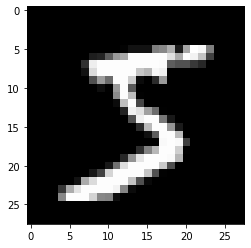

In [20]:
plt.imshow(img.view((28,28)));

## Initial python model

 [Jump_to lesson 8 video](https://course.fast.ai/videos/?lesson=8&t=2342)

 [Jump_to lesson 8 video](https://course.fast.ai/videos/?lesson=8&t=2342)

In [0]:
weights = torch.randn(784,10)

In [0]:
bias = torch.zeros(10)

#### pytorch中的cat、stack、tranpose、permute、unsqueeze, view, squeeze, max


In [0]:
import torch

另外，squeeze、unsqueeze操作不改变原矩阵

squeeze的用法主要就是对数据的维度进行压缩或者解压。

先看torch.squeeze() 这个函数主要对数据的维度进行压缩，去掉维数为1的的维度，比如是一行或者一列这种，一个一行三列（1,3）的数去掉第一个维数为一的维度之后就变成（3）行。squeeze(a)就是将a中所有为1的维度删掉。不为1的维度没有影响。a.squeeze(N) 就是去掉a中指定的维数为一的维度。还有一种形式就是b=torch.squeeze(a，N) a中去掉指定的定的维数为一的维度。

再看torch.unsqueeze()这个函数主要是对数据维度进行扩充。给指定位置加上维数为一的维度，比如原本有个三行的数据（3），在0的位置加了一维就变成一行三列（1,3）。a.squeeze(N) 就是在a中指定位置N加上一个维数为1的维度。还有一种形式就是b=torch.squeeze(a，N) a就是在a中指定位置N加上一个维数为1的维度


In [24]:
a=torch.randn(1,3,4)
b=a.squeeze(0)#压缩第0维，第0维为1，则可以通过squeeze(0)删掉，转化为三行4列的矩阵
c=a.squeeze(1)#压缩第1维，第1维不为1，则不可以压缩
print(b)
print(c)

tensor([[-0.0713, -0.3280,  0.0174, -0.2762],
        [-1.9422, -0.0997,  1.5543, -0.4516],
        [ 2.0789,  0.0458, -0.0814, -0.0205]])
tensor([[[-0.0713, -0.3280,  0.0174, -0.2762],
         [-1.9422, -0.0997,  1.5543, -0.4516],
         [ 2.0789,  0.0458, -0.0814, -0.0205]]])


In [25]:
c=b.unsqueeze(0)#unsqueeze(i) 表示将第i维设置为1,对压缩为3行4列后的矩阵b进行操作，将第0维设置为1
print(c)
d=b.unsqueeze(1)#将第一维设置为1 
print(d)


tensor([[[-0.0713, -0.3280,  0.0174, -0.2762],
         [-1.9422, -0.0997,  1.5543, -0.4516],
         [ 2.0789,  0.0458, -0.0814, -0.0205]]])
tensor([[[-0.0713, -0.3280,  0.0174, -0.2762]],

        [[-1.9422, -0.0997,  1.5543, -0.4516]],

        [[ 2.0789,  0.0458, -0.0814, -0.0205]]])



a.view(i,j)表示将原矩阵转化为i行j列的形式   

  i为-1表示不限制行数，输出1列

In [26]:
a=torch.randn(3,4)
b=a.view(-1,1)
b

tensor([[-0.2521],
        [ 1.0425],
        [-0.9951],
        [ 1.5227],
        [ 0.8993],
        [-2.1323],
        [ 1.4717],
        [-0.1499],
        [-0.1613],
        [-1.0980],
        [-0.4234],
        [-0.4116]])

torch.max()

In [27]:
a=torch.randn(3)
print("a:\n",a)
print('max(a):',torch.max(a))#max(a),用于一维数据，求出最大值。
 
b=torch.randn(3,4)
print("b:\n",b)
print('max(b,0):',torch.max(b,0))#max(a,0),计算出数据中一列的最大值，并输出最大值所在的行号。
print('max(b,1):',torch.max(b,1))#max(a,1),计算出数据中一行的最大值，并输出最大值所在的列号。
print('max(b,1):',torch.max(b,1)[1])#输出：只输出行最大值所在的列号

a:
 tensor([ 0.5281, -0.6341,  1.2891])
max(a): tensor(1.2891)
b:
 tensor([[ 0.3478,  1.1090, -0.0136, -0.9288],
        [-0.1679,  1.1320,  0.0022,  1.5725],
        [ 0.0703,  0.9784,  0.4647,  0.1385]])
max(b,0): torch.return_types.max(
values=tensor([0.3478, 1.1320, 0.4647, 1.5725]),
indices=tensor([0, 1, 2, 1]))
max(b,1): torch.return_types.max(
values=tensor([1.1090, 1.5725, 0.9784]),
indices=tensor([1, 3, 1]))
max(b,1): tensor([1, 3, 1])


Cat
对数据沿着某一维度进行拼接。cat后数据的总维数不变.

比如下面代码对两个2维tensor（分别为2*3,1*3）进行拼接，拼接完后变为3*3还是2维的tensor。

In [28]:
import torch

torch.manual_seed(1)

x = torch.randn(2,3)
print(x)
y = torch.randn(1,3)
print(y)
print(torch.cat((x,y),0))

tensor([[ 0.6614,  0.2669,  0.0617],
        [ 0.6213, -0.4519, -0.1661]])
tensor([[-1.5228,  0.3817, -1.0276]])
tensor([[ 0.6614,  0.2669,  0.0617],
        [ 0.6213, -0.4519, -0.1661],
        [-1.5228,  0.3817, -1.0276]])


stack，增加新的维度进行堆叠
而stack则会增加新的维度。
如对两个1x2维的tensor在第0个维度上stack，则会变为2x1x2的tensor；在第1个维度上stack，则会变为1x2x2的tensor。

In [29]:
a=torch.rand((1,2))
b=torch.rand((1,2))

c=torch.stack((a,b),0)

c.size()


torch.Size([2, 1, 2])

transpose ，交换维度

In [30]:
torch.manual_seed(1)

x = torch.randn(2,3)
print(x)
x.transpose(0,1)

tensor([[ 0.6614,  0.2669,  0.0617],
        [ 0.6213, -0.4519, -0.1661]])


tensor([[ 0.6614,  0.6213],
        [ 0.2669, -0.4519],
        [ 0.0617, -0.1661]])

permute，适合多维数据，更灵活的transpose
permute是更灵活的transpose，可以灵活的对原数据的维度进行调换，而数据本身不变。

In [31]:
x = torch.randn(2,3,4)

print(x.size())

x_p = x.permute(1,0,2) # 将原来第1维变为0维，同理，0→1,2→2 print(x_p.size())
print(x_p.size())

torch.Size([2, 3, 4])
torch.Size([3, 2, 4])


#### Matrix multiplication

In [0]:
def matmul(a,b):
    ar,ac = a.shape # n_rows * n_cols
    br,bc = b.shape
    assert ac==br
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc):
            for k in range(ac): # or br
                c[i,j] += a[i,k] * b[k,j]
    return c

In [0]:
m1 = x_valid[:5]
m2 = weights

In [34]:
m1.shape,m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

In [35]:
%time t1=matmul(m1, m2)

CPU times: user 887 ms, sys: 0 ns, total: 887 ms
Wall time: 889 ms


In [36]:
t1.shape

torch.Size([5, 10])

This is kinda slow - what if we could speed it up by 50,000 times? Let's try!

In [37]:
len(x_train)

50000

#### Elementwise ops

Operators (+,-,\*,/,>,<,==) are usually element-wise.

Examples of element-wise operations:

 [Jump_to lesson 8 video](https://course.fast.ai/videos/?lesson=8&t=2682)

In [38]:
a = tensor([10., 6, -4])
b = tensor([2., 8, 7])
a,b

(tensor([10.,  6., -4.]), tensor([2., 8., 7.]))

In [39]:
a + b

tensor([12., 14.,  3.])

In [40]:
a<b

tensor([False,  True,  True])

In [41]:
(a<b).float()

tensor([0., 1., 1.])

In [42]:
(a<b).float().sum()

tensor(2.)

In [43]:
(a < b).float().mean()

tensor(0.6667)

In [44]:
m = tensor([[1., 2, 3], [4,5,6], [7,8,9]]); m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

Frobenius norm:

$$\| A \|_F = \left( \sum_{i,j=1}^n | a_{ij} |^2 \right)^{1/2}$$

*Hint*: you don't normally need to write equations in LaTeX yourself, instead, you can click 'edit' in Wikipedia and copy the LaTeX from there (which is what I did for the above equation). Or on arxiv.org, click "Download: Other formats" in the top right, then "Download source"; rename the downloaded file to end in `.tgz` if it doesn't already, and you should find the source there, including the equations to copy and paste.

In [45]:
(m*m).sum().sqrt()

tensor(16.8819)

#### Elementwise matmul

In [0]:
def matmul(a,b):
    ar,ac = a.shape
    br,bc = b.shape
    assert ac==br
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc):
            # Any trailing ",:" can be removed
            c[i,j] = (a[i,:] * b[:,j]).sum()
    return c

In [47]:
%timeit -n 10 _=matmul(m1, m2)

10 loops, best of 3: 1.28 ms per loop


In [48]:
890.1/5

178.02

In [0]:
#export
def near(a,b): return torch.allclose(a, b, rtol=1e-3, atol=1e-5)
def test_near(a,b): test(a,b,near)

In [0]:
test_near(t1,matmul(m1, m2))

### Broadcasting

The term **broadcasting** describes how arrays with different shapes are treated during arithmetic operations.  The term broadcasting was first used by Numpy.

From the [Numpy Documentation](https://docs.scipy.org/doc/numpy-1.10.0/user/basics.broadcasting.html):

    The term broadcasting describes how numpy treats arrays with 
    different shapes during arithmetic operations. Subject to certain 
    constraints, the smaller array is “broadcast” across the larger 
    array so that they have compatible shapes. Broadcasting provides a 
    means of vectorizing array operations so that looping occurs in C
    instead of Python. It does this without making needless copies of 
    data and usually leads to efficient algorithm implementations.
    
In addition to the efficiency of broadcasting, it allows developers to write less code, which typically leads to fewer errors.

*This section was adapted from [Chapter 4](http://nbviewer.jupyter.org/github/fastai/numerical-linear-algebra/blob/master/nbs/4.%20Compressed%20Sensing%20of%20CT%20Scans%20with%20Robust%20Regression.ipynb#4.-Compressed-Sensing-of-CT-Scans-with-Robust-Regression) of the fast.ai [Computational Linear Algebra](https://github.com/fastai/numerical-linear-algebra) course.*

[Jump_to lesson 8 video](https://course.fast.ai/videos/?lesson=8&t=3110)

#### Broadcasting with a scalar

In [51]:
a

tensor([10.,  6., -4.])

In [52]:
a > 0

tensor([ True,  True, False])

How are we able to do a > 0?  0 is being **broadcast** to have the same dimensions as a.

For instance you can normalize our dataset by subtracting the mean (a scalar) from the entire data set (a matrix) and dividing by the standard deviation (another scalar), using broadcasting.

Other examples of broadcasting with a scalar:

In [53]:
a + 1

tensor([11.,  7., -3.])

In [54]:
m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [55]:
2*m

tensor([[ 2.,  4.,  6.],
        [ 8., 10., 12.],
        [14., 16., 18.]])

#### Broadcasting a vector to a matrix

We can also broadcast a vector to a matrix:

In [56]:
c = tensor([10.,20,30]); c

tensor([10., 20., 30.])

In [57]:
m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [58]:
m.shape,c.shape

(torch.Size([3, 3]), torch.Size([3]))

In [59]:
m + c

tensor([[11., 22., 33.],
        [14., 25., 36.],
        [17., 28., 39.]])

In [60]:
c + m

tensor([[11., 22., 33.],
        [14., 25., 36.],
        [17., 28., 39.]])

We don't really copy the rows, but it looks as if we did. In fact, the rows are given a *stride* of 0.

In [0]:
t = c.expand_as(m)

In [62]:
t

tensor([[10., 20., 30.],
        [10., 20., 30.],
        [10., 20., 30.]])

In [63]:
m + t

tensor([[11., 22., 33.],
        [14., 25., 36.],
        [17., 28., 39.]])

In [64]:
t.storage()

 10.0
 20.0
 30.0
[torch.FloatStorage of size 3]

Stride is the jump necessary to go from one element to the next one in the specified dimension dim. A tuple of all strides is returned when no argument is passed in. Otherwise, an integer value is returned as the stride in the particular dimension dim.

In [65]:
t.stride(0), t.stride(-1), t.stride(1)

(0, 1, 1)

In [66]:
t.stride(), t.shape

((0, 1), torch.Size([3, 3]))

You can index with the special value [None] or use `unsqueeze()` to convert a 1-dimensional array into a 2-dimensional array (although one of those dimensions has value 1).

In [67]:
c.unsqueeze(0)

tensor([[10., 20., 30.]])

In [68]:
c.unsqueeze(1)

tensor([[10.],
        [20.],
        [30.]])

In [69]:
m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [70]:
c.shape, c.unsqueeze(0).shape,c.unsqueeze(1).shape

(torch.Size([3]), torch.Size([1, 3]), torch.Size([3, 1]))

In [71]:
c.shape, c[None].shape,c[:,None].shape

(torch.Size([3]), torch.Size([1, 3]), torch.Size([3, 1]))

In [74]:
c[None]

tensor([[10., 20., 30.]])

In [76]:
c[...,None]

tensor([[10.],
        [20.],
        [30.]])

You can always skip trailling ':'s. And '...' means '*all preceding dimensions*'

In [72]:
c[None].shape,c[...,None].shape

(torch.Size([1, 3]), torch.Size([3, 1]))

In [73]:
c[:,None].expand_as(m)

tensor([[10., 10., 10.],
        [20., 20., 20.],
        [30., 30., 30.]])

In [75]:
m + c[:,None]

tensor([[11., 12., 13.],
        [24., 25., 26.],
        [37., 38., 39.]])

In [77]:
c[:,None]

tensor([[10.],
        [20.],
        [30.]])

#### Matmul with broadcasting

In [0]:
def matmul(a,b):
    ar,ac = a.shape
    br,bc = b.shape
    assert ac==br
    c = torch.zeros(ar, bc)
    for i in range(ar):
#       c[i,j] = (a[i,:]          * b[:,j]).sum() # previous
        c[i]   = (a[i  ].unsqueeze(-1) * b).sum(dim=0)
    return c

In [79]:
%timeit -n 10 _=matmul(m1, m2)

10 loops, best of 3: 295 µs per loop


In [80]:
885000/277

3194.945848375451

In [0]:
test_near(t1, matmul(m1, m2))

#### Broadcasting Rules

In [82]:
c[None,:]

tensor([[10., 20., 30.]])

In [83]:
c[None,:].shape

torch.Size([1, 3])

In [84]:
c[:,None]

tensor([[10.],
        [20.],
        [30.]])

In [85]:
c[:,None].shape

torch.Size([3, 1])

In [86]:
c[None,:] * c[:,None]

tensor([[100., 200., 300.],
        [200., 400., 600.],
        [300., 600., 900.]])

In [87]:
c[None] > c[:,None]

tensor([[False,  True,  True],
        [False, False,  True],
        [False, False, False]])

When operating on two arrays/tensors, Numpy/PyTorch compares their shapes element-wise. It starts with the **trailing dimensions**, and works its way forward. Two dimensions are **compatible** when

- they are equal, or
- one of them is 1, in which case that dimension is broadcasted to make it the same size

Arrays do not need to have the same number of dimensions. For example, if you have a `256*256*3` array of RGB values, and you want to scale each color in the image by a different value, you can multiply the image by a one-dimensional array with 3 values. Lining up the sizes of the trailing axes of these arrays according to the broadcast rules, shows that they are compatible:

    Image  (3d array): 256 x 256 x 3
    Scale  (1d array):             3
    Result (3d array): 256 x 256 x 3

The [numpy documentation](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.broadcasting.html#general-broadcasting-rules) includes several examples of what dimensions can and can not be broadcast together.

### Einstein summation

Einstein summation (`einsum`) is a compact representation for combining products and sums in a general way. From the numpy docs:

"The subscripts string is a comma-separated list of subscript labels, where each label refers to a dimension of the corresponding operand. Whenever a label is repeated it is summed, so `np.einsum('i,i', a, b)` is equivalent to `np.inner(a,b)`. If a label appears only once, it is not summed, so `np.einsum('i', a)` produces a view of a with no changes."

[Jump_to lesson 8 video](https://course.fast.ai/videos/?lesson=8&t=4280)

In [0]:
# c[i,j] += a[i,k] * b[k,j]
# c[i,j] = (a[i,:] * b[:,j]).sum()
def matmul(a,b): return torch.einsum('ik,kj->ij', a, b)

In [89]:
%timeit -n 10 _=matmul(m1, m2)

The slowest run took 80.59 times longer than the fastest. This could mean that an intermediate result is being cached.
10 loops, best of 3: 32.5 µs per loop


In [90]:
885000/55

16090.90909090909

In [0]:
test_near(t1, matmul(m1, m2))

### pytorch op

We can use pytorch's function or operator directly for matrix multiplication.

[Jump_to lesson 8 video](https://course.fast.ai/videos/?lesson=8&t=4702)

In [92]:
%timeit -n 10 t2 = m1.matmul(m2)

The slowest run took 10.08 times longer than the fastest. This could mean that an intermediate result is being cached.
10 loops, best of 3: 6.9 µs per loop


In [93]:
# time comparison vs pure python:
885000/18

49166.666666666664

In [0]:
t2 = m1@m2

In [95]:
%timeit -n 10 t3= m1@m2

The slowest run took 17.33 times longer than the fastest. This could mean that an intermediate result is being cached.
10 loops, best of 3: 7 µs per loop


In [0]:
test_near(t1, t2)

In [97]:
m1.shape,m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

## Export

In [0]:
#!python notebook2script.py 01_matmul.ipynb